## Problem Statement

At some point or the other almost each one of us has used an Ola or Uber for taking a ride. 

Ride hailing services are services that use online-enabled platforms to connect between passengers and local drivers using their personal vehicles. In most cases they are a comfortable method for door-to-door transport. Usually they are cheaper than using licensed taxicabs. Examples of ride hailing services include Uber and Lyft.

To improve the efficiency of taxi dispatching systems for such services, it is important to be able to predict how long a driver will have his taxi occupied. If a dispatcher knew approximately when a taxi driver would be ending their current ride, they would be better able to identify which driver to assign to each pickup request.

In this competition, we are challenged to build a model that predicts the total ride duration of taxi trips in New York City.

## 1. Exploratory Data Analysis
Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds
 
 
 
 
 
 
 
 

## data exploration

## 1.1 Load Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
data = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


## File structure and content

In [5]:
print("no of rows : ", data.shape[0])
print("no of colums : ", data.shape[1])
data.iloc[1,:]

no of rows :  729322
no of colums :  11


id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

At first glance, we can see the types of each variable and what they look like.

### Missing Values
Knowing about missing values is important because they indicate how much we don’t know about our data. Making inferences based on just a few cases is often unwise. In addition, many modelling procedures break down when missing values are involved and the corresponding rows will either have to be removed completely or the values need to be estimated somehow.

In [6]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [9]:
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

### Reformatting features & Checking consistency
There are a variety of features within the dataset and it is important to convert them into the right format such that we can analyse them easily. This would include converting datetime features and string features. 

In [10]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')

In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848


### Univariate Visualization
First of all, let us look at some of the binary features. Looking at each feature might uncover some insight that might be useful at later modelling stages

Text(0, 0.5, 'Frequency')

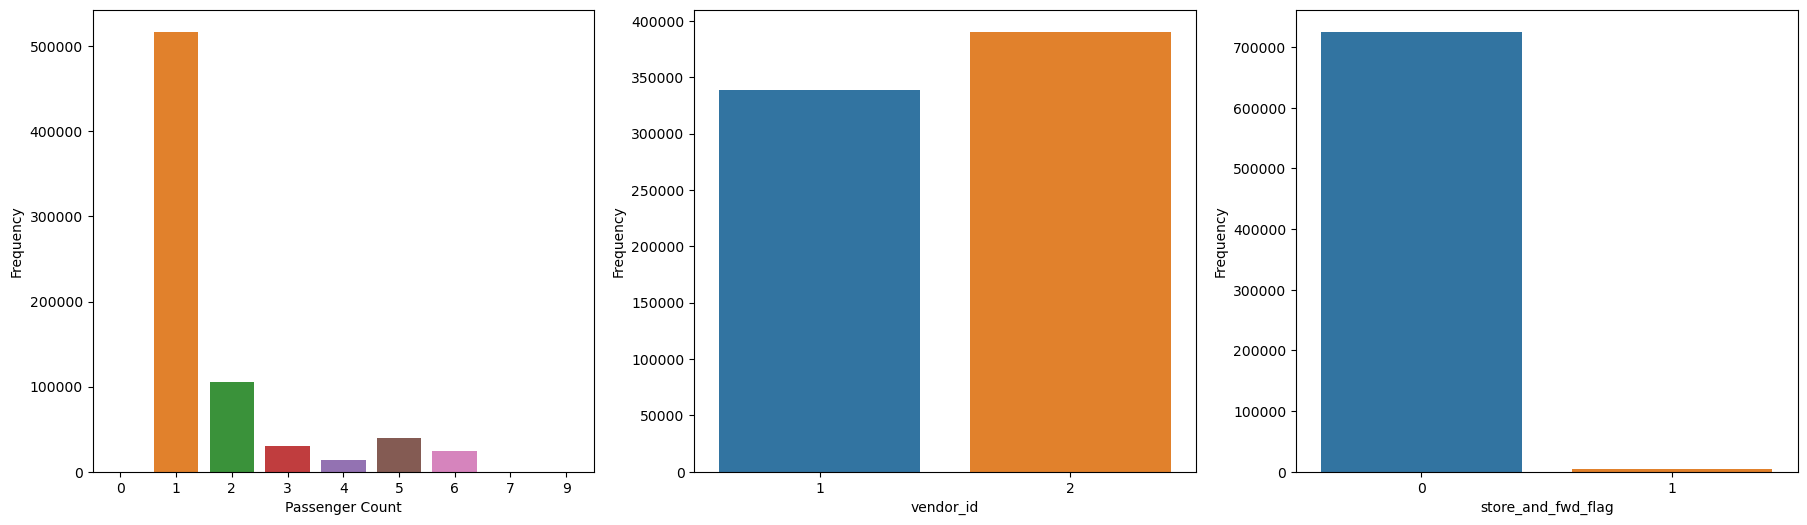

In [12]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(data['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')


Observations:
1. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
2. Vendor 2 has more number of trips as compared to vendor 1
3. The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor (“0”) or held in the memory of the taxi because there was no connection to the server (“1”), show that there was almost no storing taking place

In [13]:
# extracting day, weekday and hour from columns

data['pickup_day'] = data['pickup_datetime'].dt.day

data['pickup_day_of_week'] = data['pickup_datetime'].dt.weekday

data['pickup_hour_of_day'] = data['pickup_datetime'].dt.hour

data['dropoff_day'] = data['dropoff_datetime'].dt.day

data['dropoff_hour_of_day'] = data['dropoff_datetime'].dt.hour

data['dropoff_day_of_week'] = data['dropoff_datetime'].dt.weekday

In [14]:
data.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_of_week,pickup_hour_of_day,dropoff_day,dropoff_hour_of_day,dropoff_day_of_week
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,29,0,16,29,16,0


Text(0, 0.5, 'Total number of pickups')

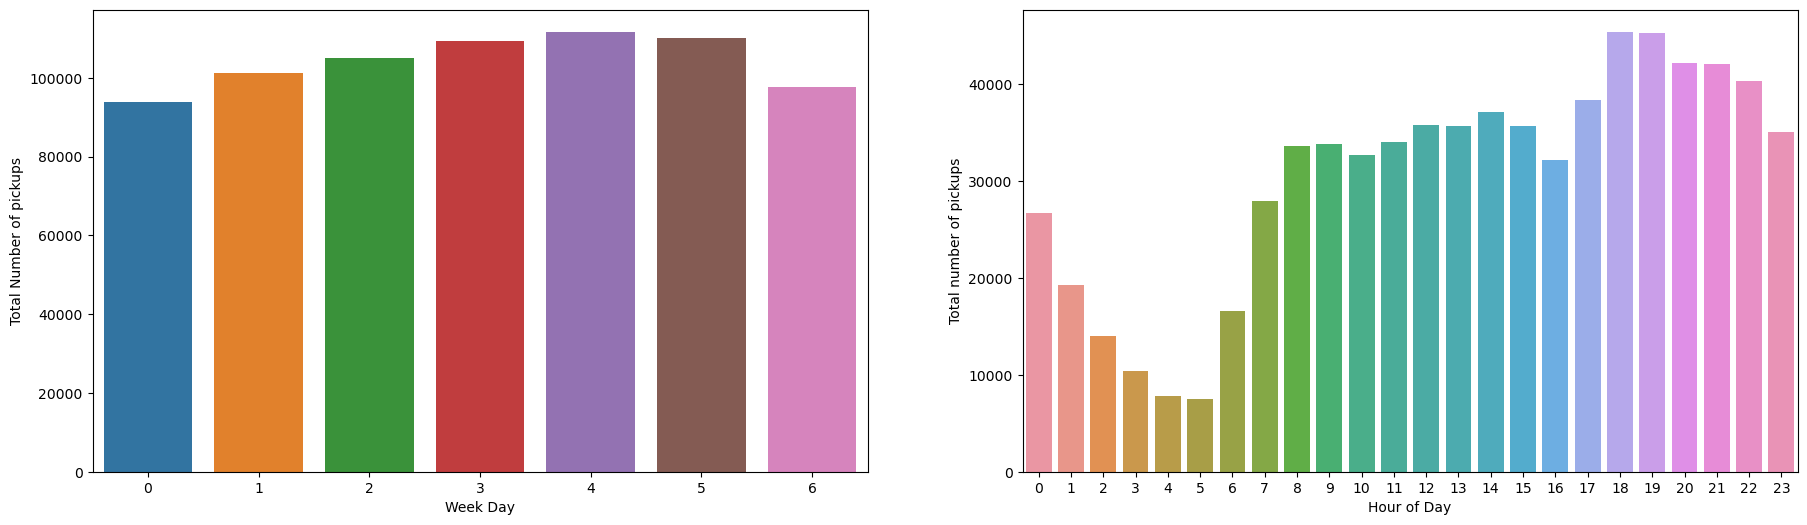

In [15]:

# Datetime features
plt.figure(figsize=(22, 6))

# Passenger Count
plt.subplot(121)
sns.countplot(data['pickup_day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sns.countplot(data['pickup_hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')


* Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
* Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.

In [18]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'pickup_day_of_week',
       'pickup_hour_of_day', 'dropoff_day', 'dropoff_hour_of_day',
       'dropoff_day_of_week'],
      dtype='object')

In [19]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

From data above we can see there are extremely low values with passenger_count 0, 7 and 9. So, we will remove these records

In [20]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

In [21]:
data.passenger_count.value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

### Target Exploration
In this section we will take a look at the trip duration which is the target variable. It is crucial to understand it in detail as this is what we are trying to predict accurately.

In [22]:
data['trip_duration'].describe()/3600 # Trip duration in hours

count    202.579722
mean       0.264515
std        1.073531
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

Woah! There is a trip with duration of 979 hours. This is a huge outlier and might create problems at the prediction stage. One idea is to log transform the trip duration before prediction to visualise it better.

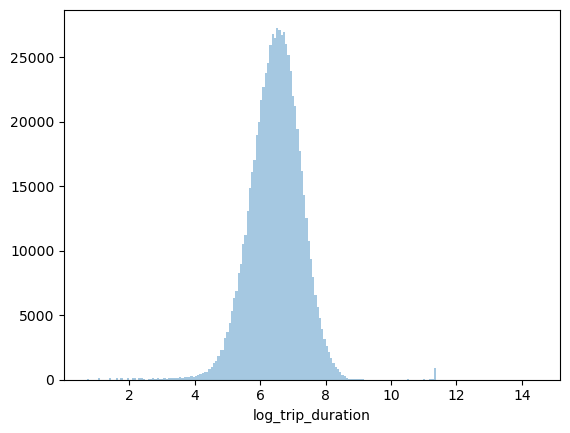

In [23]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
sns.distplot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

We find:

1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.

In [24]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_day_of_week,pickup_hour_of_day,dropoff_day,dropoff_hour_of_day,dropoff_day_of_week,log_trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,29,0,16,29,16,0,5.993961
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,11,4,23,11,23,4,7.003974
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,21,6,17,21,18,6,7.400010
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,5,1,9,5,10,1,7.040536
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,17,2,6,17,6,2,6.744059


In [25]:
# droping following columns from dataset

data_new = data.drop(columns=['id','pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude',
                       'dropoff_longitude','dropoff_latitude','trip_duration'])

In [26]:
data_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_day,pickup_day_of_week,pickup_hour_of_day,dropoff_day,dropoff_hour_of_day,dropoff_day_of_week,log_trip_duration
0,2,1,0,29,0,16,29,16,0,5.993961
1,1,2,0,11,4,23,11,23,4,7.003974
2,2,2,0,21,6,17,21,18,6,7.400010
3,2,6,0,5,1,9,5,10,1,7.040536
4,1,1,0,17,2,6,17,6,2,6.744059


In [27]:
#seperating independent and dependent variables
x = data_new.drop('log_trip_duration', axis=1)
y = data_new['log_trip_duration']

### Conclusions
1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.
4. Most of the trips involve only 1 passenger. There are trips with 7-9 passengers but they are very low in number.
5. Vendor 2 has more number of trips as compared to vendor 1
6. Number of pickups for weekends is much lower than week days with a peak on Thursday (4). Note that here weekday is a decimal number, where 0 is Sunday and 6 is Saturday.
7. Number of pickups as expected is highest in late evenings. However, it is much lower during the morning peak hours.
8. Trip durations are definitely shorter for late night and early morning hours that can be attributed to low traffic density

# 1: Choose the most suitable evaluation metric and state why you chose it?

This is a regression problem, hence I am choosing RMSE(root mean squared error) because it is most commonly used in regression problem.

We have a lot of options to choose as evaluation metric such as, Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Root Mean Squared log error and R-squared.

RMSE is a very simple metric to be used for evaluation. Lower the value of RMSE, better the model.

RMSE brings down the unit of the differnce between predicted and actual values to the same unit.

In [28]:
# dividing the data for training and testing with the help of train_test_split function

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# 2. Build a BenchMark model for the given dataset 

In [29]:
# creating train and test set for benchmark model

bench_train = pd.concat([x_train, y_train], axis=1, join="inner")
bench_test = pd.concat([x_test, y_test], axis=1, join="inner")

In [30]:
bench_train.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_day,pickup_day_of_week,pickup_hour_of_day,dropoff_day,dropoff_hour_of_day,dropoff_day_of_week,log_trip_duration
203420,2,1,0,29,1,15,29,15,1,6.115892
318505,2,2,0,2,2,12,2,12,2,6.720220
190735,2,5,0,2,5,19,2,19,5,7.681099
387936,2,1,0,25,3,10,25,10,3,7.129298
71052,2,1,0,26,1,7,26,7,1,4.488636


In [31]:
bench_test.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_day,pickup_day_of_week,pickup_hour_of_day,dropoff_day,dropoff_hour_of_day,dropoff_day_of_week,log_trip_duration
343319,1,1,0,3,1,6,3,6,1,7.064759
719526,1,1,0,14,5,19,14,19,5,5.924256
358943,1,1,0,22,6,2,22,2,6,6.270988
316420,2,1,0,9,3,6,9,6,3,7.267525
485918,2,1,0,6,4,14,6,14,4,5.187386


In [32]:
# storing simple mean in a new column in the test set as "simple_mean"
bench_test['simple_mean'] = bench_train['log_trip_duration'].mean()

In [33]:
# error in simple mean model

from sklearn.metrics import mean_squared_error

error = sqrt(mean_squared_error(bench_test['log_trip_duration'], bench_test['simple_mean']))

print("benchmark model error is : ", error)

benchmark model error is :  0.7935327074812147


# K - NEAREST NEIGHBOURS MODEL

In [34]:
knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [35]:
y_pred = knnr.predict(x_test)

error = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", error)

RMSE of knn model:  0.8121177727098159


# Finding the value of k using elbow method

In [36]:
k = range(1, 10)

In [37]:
def elbow(k):
  #initiating empty list
  test = []

  #training model for evey value of K  
  for i in k:
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(x_train, y_train)

    temp_pred = reg.predict(x_test)
    temp_error = sqrt(mean_squared_error(temp_pred, y_test))
    test.append(temp_error)

  return test

In [38]:
test = elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

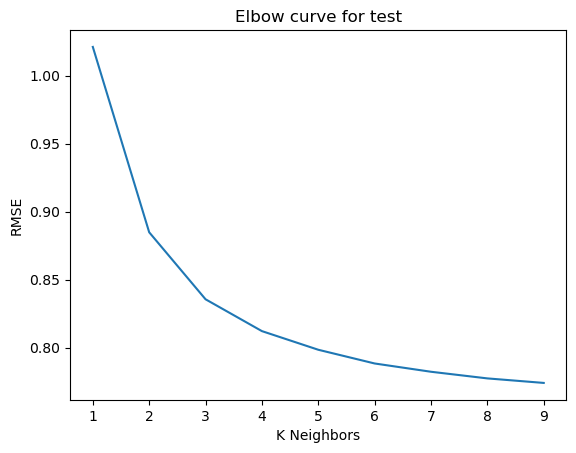

In [39]:
# plotting the curve

plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('RMSE')
plt.title('Elbow curve for test')
 

In [40]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(x_train, y_train)

KNeighborsRegressor()

### test score of knn model

In [41]:
y_pred = knnr.predict(x_test)

knn_test_rmse = sqrt(mean_squared_error(y_test, y_pred))

print("RMSE of knn model: ", knn_test_rmse)

RMSE of knn model:  0.7984163709051925


### train score of knn model

In [42]:
y_pred = knnr.predict(x_train)

knn_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of knn model: ", knn_train_rmse)

RMSE of knn model:  0.7477783003168744


best value of k is 5

# 4.Linear Regression model

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### testing RMSE

In [44]:
y_pred = lr.predict(x_test)

lm_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.792053265369792


### training RMSE

In [45]:
y_pred = lr.predict(x_train)

lm_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.7934012054123708


# Decision Tree model

In [46]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

### testing RMSE

In [47]:
y_pred = dtr.predict(x_test)

dtr_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of decision tree regressor model: ", dtr_test_rmse)

RMSE of decision tree regressor model:  0.7562614466291371


### training RMSE

In [48]:
y_pred = dtr.predict(x_train)

dtr_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of decision tree regressor model: ", dtr_train_rmse)

RMSE of decision tree regressor model:  0.6723558853055338


## bar plots

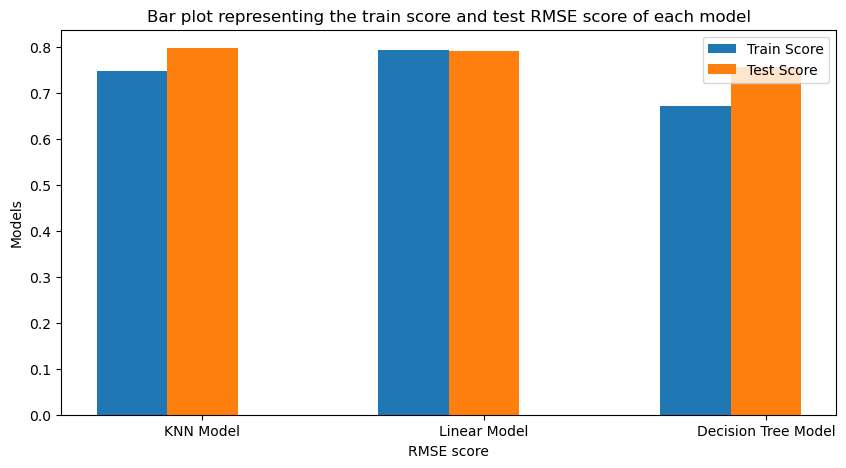

In [49]:
plt.figure(figsize=[10, 5])

train_scores = [0.747, 0.793, 0.672]
test_scores = [0.798, 0.792, 0.756]

# Passing the parameters to the bar function
# Using X now to align the bars side by side
X = np.arange(len(train_scores))


# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, train_scores,  width = 0.25)
plt.bar(X + 0.25, test_scores, width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Train Score', 'Test Score'])

labels = ['KNN Model', 'Linear Model', 'Decision Tree Model']

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(3)], labels)

plt.title("Bar plot representing the train score and test RMSE score of each model")
plt.xlabel('RMSE score')
plt.ylabel('Models')


# Displaying the bar plot
plt.show()